In [1]:
import matplotlib.pyplot as plt
import ray
from ray.rllib.agents import ppo
from ray.rllib.models import ModelCatalog
from tqdm import tqdm

import sys
sys.path.insert(1, '/home/lorenzo/Desktop/master_thesis/scripts')

from aie import plotting
from aie.aie_env import AIEEnv
from rl.conf import BASE_PPO_CONF
from aie.env_conf import ENV_US, ENV_ITALY, ENV_COMMUNISM
from rl.models.tf.fcnet import FCNet
import pandas as pd

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
ray.init()
ModelCatalog.register_custom_model("my_model", FCNet)

2021-11-12 10:52:11,794	INFO services.py:1172 -- View the Ray dashboard at http://127.0.0.1:8265


2021-11-12 10:52:13,600	INFO trainer.py:616 -- Tip: set framework=tfe or the --eager flag to enable TensorFlow eager execution
2021-11-12 10:52:13,602	INFO trainer.py:641 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2021-11-12 10:52:16,567	WARNING deprecation.py:33 -- DeprecationWarning: `framestack` has been deprecated. Use `num_framestacks (int)` instead. This will raise an error in the future!
2021-11-12 10:52:16,854	WARNING deprecation.py:33 -- DeprecationWarning: `TFModelV2.register_variables` has been deprecated. This will raise an error in the future!
2021-11-12 10:52:21,259	INFO trainable.py:371 -- Restored on 10.201.19.85 from checkpoint: /home/lorenzo/Desktop/master_thesis/ray_results/FREE/checkpoint_17970/checkpoint-17970
2021-11-12 10:52:21,261	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 17970, '_timesteps_total': None, '_time_total': 978451.3357105255, '_episodes_total': 215580

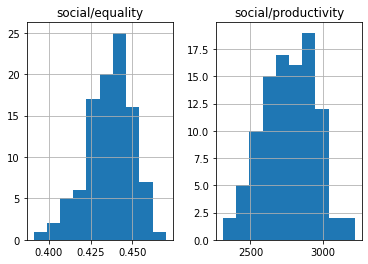

In [3]:
trainer = ppo.PPOTrainer(config={
    **BASE_PPO_CONF,
    "num_workers": 0,
})

ckpt_path = '/home/lorenzo/Desktop/master_thesis/ray_results/FREE/checkpoint_17970/checkpoint-17970'
trainer.restore(str(ckpt_path))
env = AIEEnv({}, force_dense_logging=True)

df = pd.DataFrame()

for i in tqdm(range(100)):
    obs = env.reset()
    for t in range(1000):
        results = {
            k: trainer.compute_action(
                v,
                policy_id='learned',
                explore=False,
            )
            for k, v in obs.items()
        }
        obs, reward, done, info = env.step(results)
    df = df.append(env.env.scenario_metrics(),ignore_index=True)

df.hist(column=['social/equality','social/productivity'])
df.to_csv('data_out/Free.csv', mode='a', header=False)

2021-11-12 11:04:22,468	WARNING deprecation.py:33 -- DeprecationWarning: `framestack` has been deprecated. Use `num_framestacks (int)` instead. This will raise an error in the future!
2021-11-12 11:04:26,248	INFO trainable.py:371 -- Restored on 10.201.19.85 from checkpoint: /home/lorenzo/Desktop/master_thesis/ray_results/US/checkpoint_20020/checkpoint-20020
2021-11-12 11:04:26,249	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 20020, '_timesteps_total': None, '_time_total': 656971.363036871, '_episodes_total': 240180}
100%|██████████| 100/100 [11:10<00:00,  6.71s/it]


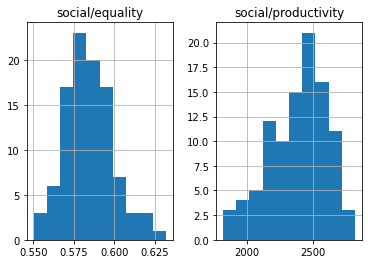

In [4]:
trainer = ppo.PPOTrainer(config={
    **BASE_PPO_CONF,
    "num_workers": 0,
})

ckpt_path = '/home/lorenzo/Desktop/master_thesis/ray_results/US/checkpoint_20020/checkpoint-20020'
trainer.restore(str(ckpt_path))
env = AIEEnv(ENV_US, force_dense_logging=True)

dfUs = pd.DataFrame()
for i in tqdm(range(100)):
    obs = env.reset()
    for t in range(1000):
        results = {
            k: trainer.compute_action(
                v,
                policy_id='learned',
                explore=False,
            )
            for k, v in obs.items()
        }
        obs, reward, done, info = env.step(results)
    dfUs = dfUs.append(env.env.scenario_metrics(),ignore_index=True)
    
dfUs.hist(column=['social/equality','social/productivity'])
dfUs.to_csv('data_out/US.csv', mode='a', header=False)

2021-11-12 11:15:39,268	WARNING deprecation.py:33 -- DeprecationWarning: `framestack` has been deprecated. Use `num_framestacks (int)` instead. This will raise an error in the future!
2021-11-12 11:15:42,657	INFO trainable.py:371 -- Restored on 10.201.19.85 from checkpoint: /home/lorenzo/Desktop/master_thesis/ray_results/ITA/checkpoint_15680/checkpoint-15680
2021-11-12 11:15:42,658	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 15680, '_timesteps_total': None, '_time_total': 1109664.626226902, '_episodes_total': 188160}
100%|██████████| 100/100 [11:23<00:00,  6.84s/it]


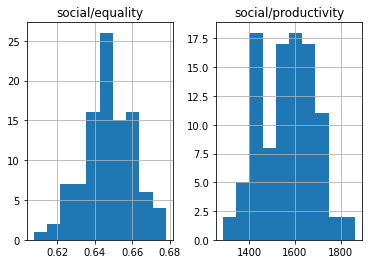

In [5]:
trainer = ppo.PPOTrainer(config={
    **BASE_PPO_CONF,
    "num_workers": 0,
})

ckpt_path = '/home/lorenzo/Desktop/master_thesis/ray_results/ITA/checkpoint_15680/checkpoint-15680'
trainer.restore(str(ckpt_path))
env = AIEEnv(ENV_ITALY, force_dense_logging=True)

dfIta = pd.DataFrame()
for i in tqdm(range(100)):
    obs = env.reset()
    for t in range(1000):
        results = {
            k: trainer.compute_action(
                v,
                policy_id='learned',
                explore=False,
            )
            for k, v in obs.items()
        }
        obs, reward, done, info = env.step(results)
    dfIta = dfIta.append(env.env.scenario_metrics(),ignore_index=True)
    
dfIta.hist(column=['social/equality','social/productivity'])
dfIta.to_csv('data_out/Ita.csv', mode='a', header=False)

2021-11-12 11:27:08,760	WARNING deprecation.py:33 -- DeprecationWarning: `framestack` has been deprecated. Use `num_framestacks (int)` instead. This will raise an error in the future!
2021-11-12 11:27:12,186	INFO trainable.py:371 -- Restored on 10.201.19.85 from checkpoint: /home/lorenzo/ray_results/Comm_P3/checkpoint_13000/checkpoint-13000
2021-11-12 11:27:12,187	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 13000, '_timesteps_total': None, '_time_total': 294028.08872771263, '_episodes_total': 155940}
100%|██████████| 100/100 [11:16<00:00,  6.77s/it]


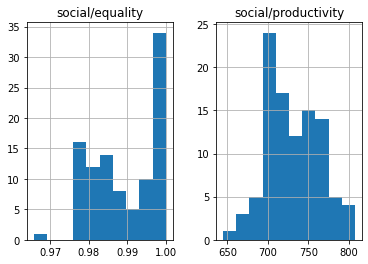

In [6]:
trainer = ppo.PPOTrainer(config={
    **BASE_PPO_CONF,
    "num_workers": 0,
})

ckpt_path = '/home/lorenzo/ray_results/Comm_P3/checkpoint_13000/checkpoint-13000'
trainer.restore(str(ckpt_path))
env = AIEEnv(ENV_COMMUNISM, force_dense_logging=True)

dfComm = pd.DataFrame()
for i in tqdm(range(100)):
    obs = env.reset()
    for t in range(1000):
        results = {
            k: trainer.compute_action(
                v,
                policy_id='learned',
                explore=False,
            )
            for k, v in obs.items()
        }
        obs, reward, done, info = env.step(results)
    dfComm = dfComm.append(env.env.scenario_metrics(),ignore_index=True)
    
dfComm.hist(column=['social/equality','social/productivity'])
dfComm.to_csv('data_out/Comm.csv', mode='a', header=False)

In [7]:
descr = dfComm.describe()

In [8]:
descr[['social/equality','social/productivity']]


,social/equality,social/productivity
count,100.000000,100.000000
mean,0.989795,730.308847
std,0.009034,33.423221
min,0.965711,644.379464
25%,0.981017,705.351065
50%,0.988605,725.998049
75%,1.000000,755.627535
max,1.000000,807.616635


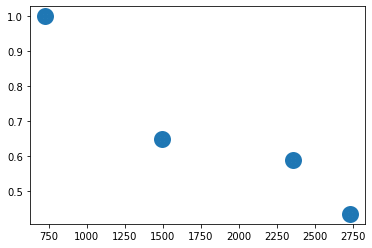

In [9]:
x = [2728.145890, 2358.730130, 1494.825375, 728.598160]
y = [0.435012, 0.588720, 0.648842, 0.999305]

fig, ax = plt.subplots()
ax.scatter(x,y,lw=11)